## Emergency (911) Calls: Fire, Traffic, EMS for Montgomery County, PA

Public dataset from [Kaggle](https://www.kaggle.com/mchirico/montcoalert)

### 1. Data and Setup

#### Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Reading in the csv file as a dataframe called df:

In [2]:
df = pd.read_csv('911.csv')

#### Checking the info() of the table:

* Total number of rows: 99 492
* Total number of columns: 9

Some columns have null values: 'zip', 'twp', 'addr'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


#### Checking the head of the table:

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 2. Top 5 zipcodes and townships

#### The top 5 zipcodes for 911 calls:

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### The top 5 townships (twp) for 911 calls:

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### 3. Reasons for calling 911

#### Checking the 'title' column
'Title' column has 110 unique values out of 99 492 entries:

In [7]:
df['title'].nunique()

110

#### Creating 'reason' column and checking reasons for calling 911
There are 3 reasons for calling 911: 
* EMS (the most popular)
* Traffic
* Fire (the least popular)

In [8]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

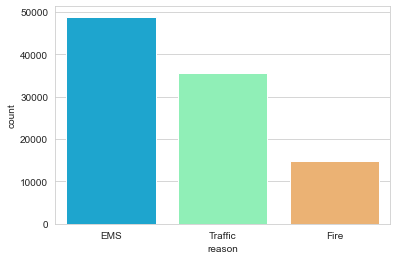

In [9]:
sns.countplot(x='reason', data=df, order =['EMS','Traffic','Fire'], palette='rainbow')

### 4. Reasons for calling 911 by day of the week

**Data type** of the objects in the 'timeStamp' column **is 'str'**:

In [10]:
type(df['timeStamp'].iloc[0])

str

#### Converting the 'timeStamp' column from strings to DateTime objects:

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Creating 'day_of_week' column:
The Day of Week is an integer 0-6

In [12]:
def day_of_week(timestamp):
    return timestamp.day_of_week

df['day_of_week'] = df['timeStamp'].apply(day_of_week)
df['day_of_week'].unique()

array([3, 4, 5, 6, 0, 1, 2])

#### Using the .map() method to map the actual string names to the day of the week

In [13]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['day_of_week'] = df['day_of_week'].map(dmap)
df['day_of_week'].unique()

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

#### Creating a countplot of the Day of Week column with the hue based off of the Reason column:

Text(0.5, 0, 'Day of Week')

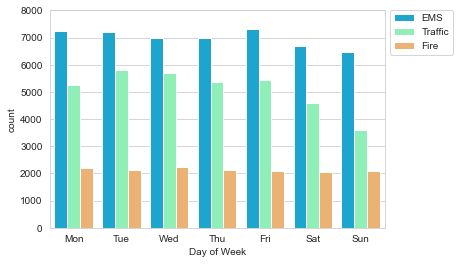

In [14]:
sns.countplot(x='day_of_week', data=df, hue='reason', palette='rainbow',
              order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], 
              hue_order=['EMS','Traffic', 'Fire']).legend(loc='center left', bbox_to_anchor=(1,0.9))
plt.ylim(0,8000)
plt.xlabel('Day of Week')

### 3. Count of 911 calls per month

#### Creating 'month' column:
The Month is an integer 1-8, 12. There is no data for calls in September, October, November. 

In [15]:
def month(timestamp):
    return timestamp.month
df['month'] = df['timeStamp'].apply(month)
df['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8])

#### Creating a groupby object called 'byMonth'
Grouping the DataFrame by the month column and using the count() method for aggregation

In [16]:
byMonth = df.groupby('month').count().reset_index()
byMonth.head(3)

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,day_of_week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101


#### Creating a lineplot and a regplot
Creating a line plot off of the DataFrame indicating the count of calls per month (with extrapolation for missing months).

Using seaborn's regplot() to create a linear fit on the number of calls per month.

Text(0, 0.5, 'Number of Calls')

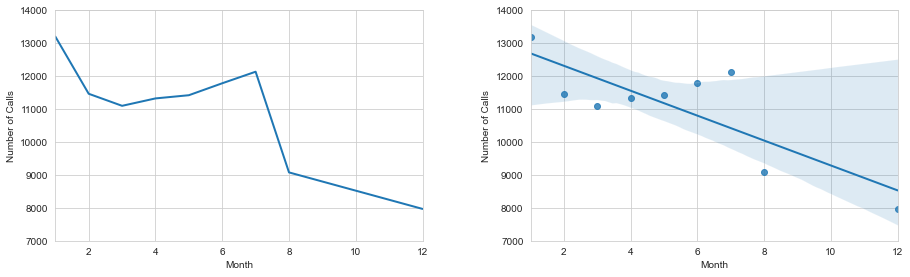

In [17]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.85, 0.8])

sns.lineplot(x='month', y='lat', data=byMonth, lw=2)
plt.xlim(1,12)
plt.ylim(7000,14000)
plt.xlabel('Month')
plt.ylabel('Number of Calls')

axes2 = fig.add_axes([1.2, 0.1, 0.85, 0.8])

sns.regplot(x='month', y='lat', data=byMonth, line_kws={'linewidth':2})
plt.xlim(1,12)
plt.ylim(7000,14000)
plt.xlabel('Month')
plt.ylabel('Number of Calls')

### 4. Time Series

#### Creating 'Date' column
'Date' column contains the date from the timeStamp column.

In [18]:
def date(timestamp):
    return timestamp.date()

df['date'] = df['timeStamp'].apply(date)

#### Creating plots:

1) creating a plot of counts of 911 calls (All calls);

2) creating 3 separate plots with each plot representing a Reason for the 911 call

On the plots we can easily see outliers.

In [19]:
by_date = df.groupby('date').count().reset_index()

Text(0, 0.5, 'Number of Calls')

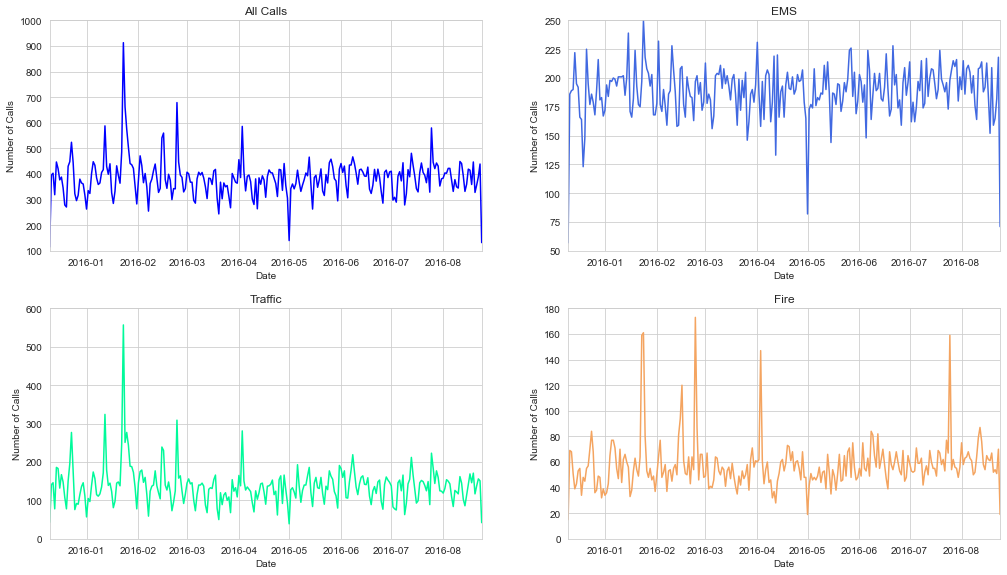

In [20]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 1, 0.8])
sns.lineplot(x='date', y='lat', data=by_date, color='blue')
plt.xlim(by_date['date'].min(), by_date['date'].max())
plt.ylim(100,1000)
plt.title('All Calls')
plt.xlabel('Date')
plt.ylabel('Number of Calls')

axes2 = fig.add_axes([1.3, 0.1, 1, 0.8])
sns.lineplot(x='date', y='lat', data=df[df['reason'] =='EMS'].groupby('date').count().reset_index(), color='royalblue')
plt.xlim(by_date['date'].min(), by_date['date'].max())
plt.ylim(50,250)
plt.title('EMS')
plt.xlabel('Date')
plt.ylabel('Number of Calls')


axes3 = fig.add_axes([0.1, -0.9, 1, 0.8])
sns.lineplot(x='date', y='lat', data=df[df['reason'] =='Traffic'].groupby('date').count().reset_index(), 
             color='mediumspringgreen')
plt.xlim(by_date['date'].min(), by_date['date'].max())
plt.ylim(0,600)
plt.title('Traffic')
plt.xlabel('Date')
plt.ylabel('Number of Calls')

axes4 = fig.add_axes([1.3, -0.9, 1, 0.8])
sns.lineplot(x='date', y='lat', data=df[df['reason'] =='Fire'].groupby('date').count().reset_index(), 
             color='sandybrown')
plt.xlim(by_date['date'].min(), by_date['date'].max())
plt.ylim(0,180)
plt.title('Fire')
plt.xlabel('Date')
plt.ylabel('Number of Calls')

### 5. HeatMap & ClusterMap (day of week - hours)

#### Creating 'hour' column from 'timeStamp' column

In [58]:
def hour(timestamp):
    return timestamp.hour
df['hour'] = df['timeStamp'].apply(hour)
df['hour'].unique()

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16])

#### Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week

In [52]:
dayHour = df.groupby(by=['day_of_week','hour']).count()['reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


#### Creating HeatMap & ClusterMap

<AxesSubplot:xlabel='hour', ylabel='day_of_week'>

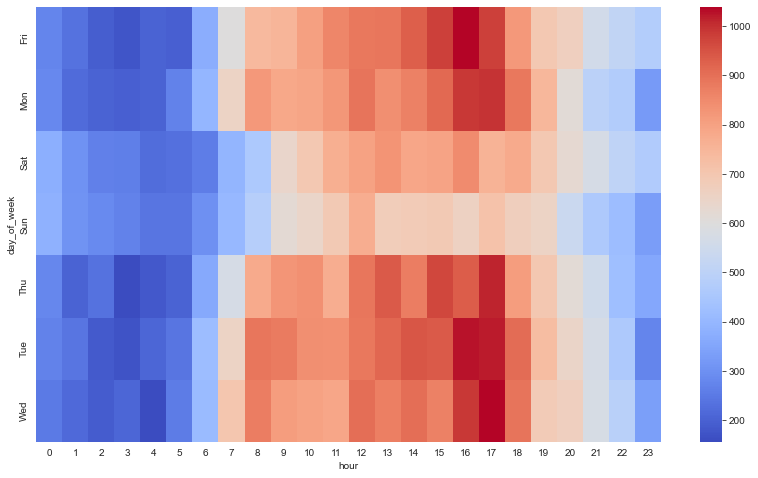

In [56]:
plt.figure(figsize=(14,8))
sns.heatmap(dayHour,cmap='coolwarm')

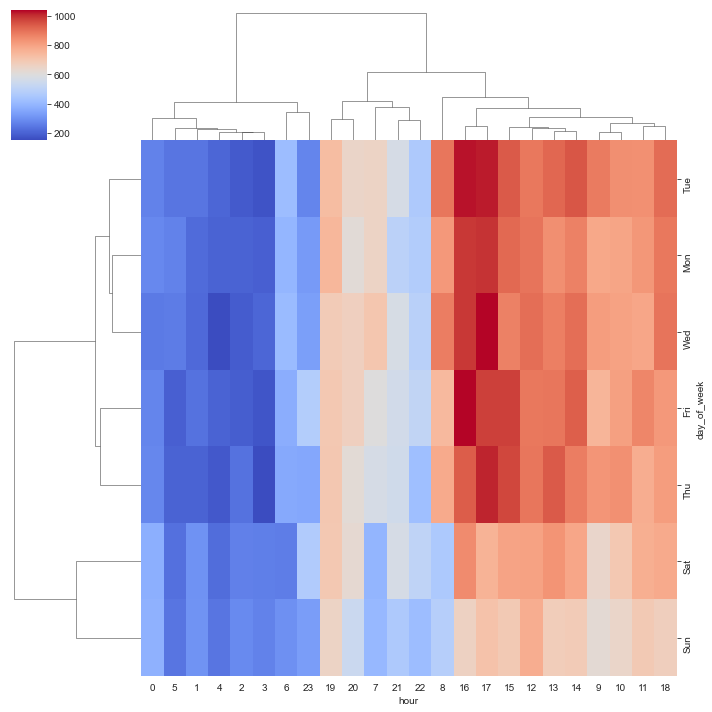

In [57]:
sns.clustermap(dayHour,cmap='coolwarm')

### 6. HeatMap & ClusterMap (day of week - months)

#### Repeating these same HeatMap and ClusterMap, for a DataFrame that shows the Month as the column

In [61]:
dayMonth = df.groupby(by=['day_of_week','month']).count()['reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
day_of_week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='month', ylabel='day_of_week'>

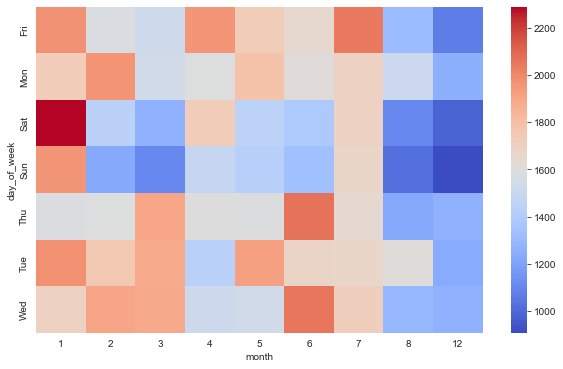

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(dayMonth,cmap='coolwarm')

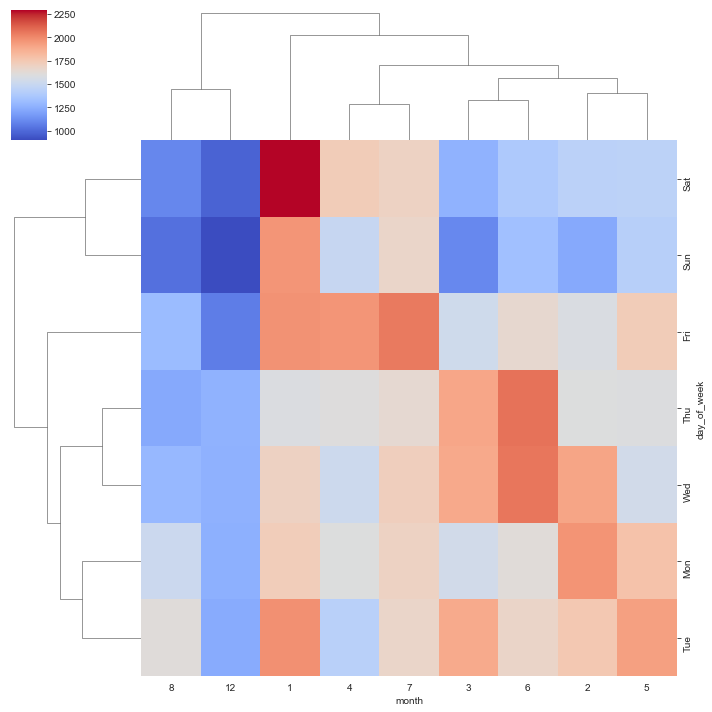

In [65]:
sns.clustermap(dayMonth,cmap='coolwarm')